In [99]:
# Dependencies
import json
import tweepy 
import pandas as pd
import matplotlib.pyplot as plt
import textblob
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from datetime import datetime

# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [100]:
# BBC, CBS, CNN, Fox, and New York times.
target_users = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes']


sentiments = []

for target_user in target_users : 
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, count=100, result_type="recent") 
    
    # Counter
    counter = 1

    user_sentiments = []
    
    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        user_sentiments.append({"Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1
    
    # Variables for holding sentiments
    sentiments.append({"Media Source" : target_user,
                       "Tweet Sentiments" : user_sentiments
                      })
    

In [101]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Media Source,Tweet Sentiments
0,BBC,"[{'Compound': -0.296, 'Positive': 0.0, 'Negati..."
1,CBS,"[{'Compound': 0.0, 'Positive': 0.0, 'Negative'..."
2,CNN,"[{'Compound': 0.0, 'Positive': 0.0, 'Negative'..."
3,FoxNews,"[{'Compound': -0.6249, 'Positive': 0.0, 'Negat..."
4,nytimes,"[{'Compound': -0.296, 'Positive': 0.0, 'Negati..."


In [102]:
for sentiment in sentiments :
    
    for tweet_sentiment in sentiment["Tweet Sentiments"] :
        
        plt.scatter(tweet_sentiment["Tweets Ago"], tweet_sentiment["Compound"], marker="o", edgecolors="black")
    
    
    
    #print(comp_sentiment["Media Source"])

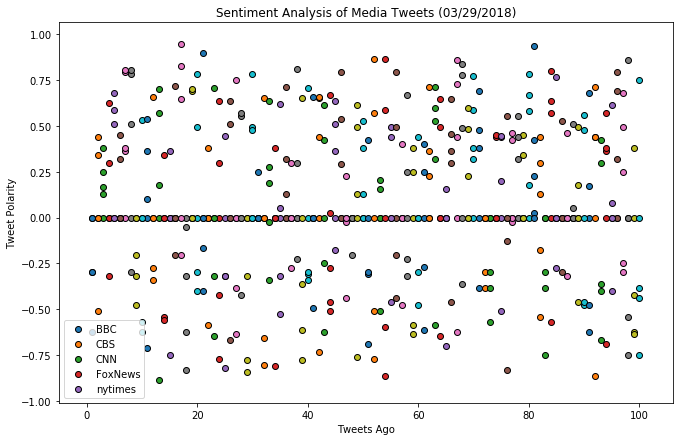

In [103]:
plt.title("Sentiment Analysis of Media Tweets (03/29/2018)")

plt.ylabel("Tweet Polarity")

plt.xlabel("Tweets Ago")

plt.gcf().set_size_inches(11, 7)

plt.legend(target_users)

plt.show()

In [104]:
for sentiment in sentiments :
    
    for tweet_sentiment in sentiment["Tweet Sentiments"] :
        
        plt.bar(tweet_sentiment["Tweets Ago"], tweet_sentiment["Compound"])


In [105]:
tweet_bbc_pd = pd.DataFrame(sentiments[0]["Tweet Sentiments"])
tweet_bbc_pd["Compound"].mean()


0.033419000000000004

In [106]:
tweet_cbs_pd = pd.DataFrame(sentiments[1]["Tweet Sentiments"])
tweet_cbs_pd["Compound"].mean()


0.353884

In [107]:
tweet_cnn_pd = pd.DataFrame(sentiments[2]["Tweet Sentiments"])
tweet_cnn_pd["Compound"].mean()


0.013803999999999993

In [108]:
tweet_foxnews_pd = pd.DataFrame(sentiments[3]["Tweet Sentiments"])
tweet_foxnews_pd["Compound"].mean()


-0.03377999999999997

In [109]:
tweet_nytimes_pd = pd.DataFrame(sentiments[4]["Tweet Sentiments"])
tweet_nytimes_pd["Compound"].mean()


-0.04262199999999998

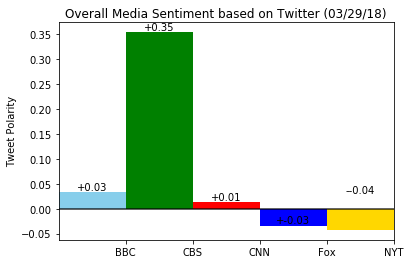

In [111]:
comp_percent = (tweet_bbc_pd["Compound"].mean(),
                tweet_cbs_pd["Compound"].mean(),
                tweet_cnn_pd["Compound"].mean(),
                tweet_foxnews_pd["Compound"].mean(),
                tweet_nytimes_pd["Compound"].mean())

fig, ax = plt.subplots()
ind = np.arange(len(comp_percent))  
width = 1
rect1 = ax.bar(ind[0], comp_percent[0], width, color="skyblue")
rect2 = ax.bar(ind[1], comp_percent[1], width, color="green")
rect3 = ax.bar(ind[2], comp_percent[2], width, color="red")
rect4 = ax.bar(ind[3], comp_percent[3], width, color='blue')
rect5 = ax.bar(ind[4], comp_percent[4], width, color='gold')

ax.set_ylabel("Tweet Polarity")
ax.set_title(f"Overall Media Sentiment based on Twitter ({datetime.today().strftime('%m/%d/%y')})")
ax.set_xticks(ind+0.5)
ax.set_xticklabels(("BBC", "CBS","CNN", "Fox","NYT"))
ax.set_xlim([-0.5,4.5])
ax.grid(False)
plt.hlines(0,-0.5, 4.5, alpha=0.8)

# Generate labels for each news source
def autolabelpos(rects):
  # attach some text labels
  for rect in rects:
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2., 1*height,
              '+%.2f' % float(height),
              ha='center', va='bottom')

def autolabelneg(rects):
  # attach some text labels
  for rect in rects:
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
              '-%.2f' % float(height),
              ha='center', va='bottom')

autolabelpos(rect1)
autolabelpos(rect2)
autolabelpos(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

plt.show()